In [87]:
from PIL import Image
import numpy as np
import os

# 待优化，在read_character中加循环，如果发现不是需要store的就直接跳过，不需要再read image了

def read_character(f):
    sample_size = int.from_bytes(f.read(4), byteorder = 'little')
    if sample_size == 0:
        return None, None, None, None
    # tag_code = int.from_bytes(f.read(2), byteorder = 'little')
    # int.to_bytes(tag_code, length = 2, byteorder = "little").decode("GBK")
    character = f.read(2).decode("GBK")
    width = int.from_bytes(f.read(2), byteorder = 'little')
    height = int.from_bytes(f.read(2), byteorder = 'little')
    image = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            image[i][j] = int.from_bytes(f.read(1), byteorder = 'little')
    return character, height, width, image
def store_image(character, height, width, image_arr):
    image_dir = "images/"
    image = Image.fromarray(np.array(image_arr, dtype=np.uint8))
    image.save("%s%s_%d_%d.png" % (image_dir, character, height, width))
characters = set(["金", "木", "水", "火", "土"])
def is_stored(character):
    return character in characters
def read_gnt_file(filename):
    f = open(filename, "rb")
    while True:
        character, height, width, image = read_character(f)
        if character == None:
            break
        if is_stored(character):
            store_image(character, height, width, image)
        # print(character)
    return image
def get_original_image(gnt_dir):
    for filename in os.listdir(gnt_dir):
        print("Processing %s ..." % filename)
        read_gnt_file(os.path.join(gnt_dir, filename))

In [85]:
get_original_image("HWDB1.1trn_gnt")

In [45]:
temp = Image.fromarray(np.array(image, dtype=np.uint8))

In [112]:
class LabelToNumber:
    def __init__(self):
        self.mapping = {}
        self.labels = []
    def encode(self, label):
        if label not in self.mapping:
            self.labels.append(label)
            self.mapping[label] = len(self.labels) - 1
            return len(self.labels) - 1
        else:
            return self.mapping[label]
    def save(self, filename):
        f = open(filename, "w")
        for label in self.labels:
            f.write("%s\n" % label)
# Since the dataset is small, we put all data in one single file
def generate_dataset(image_dir):
    images = []
    labels = []
    converter = LabelToNumber()
    for filename in os.listdir(image_dir):
        if filename.startswith("."):
            continue
        resized_image = Image.open(os.path.join(image_dir, filename)).convert('L').resize((64, 64), Image.ANTIALIAS)
        image_vec = np.asarray(resized_image) / 255.0
        label = converter.encode(filename.split("_")[0])
        images.append(image_vec)
        labels.append(label)
    converter.save("characters.txt")
    return np.array(images).reshape([-1, 64, 64, 1]), np.array(labels)

In [113]:
X, y = generate_dataset("images")

In [114]:
np.savez("input_data", X=X, y=y)

In [115]:
temp_image = Image.open("test.png")

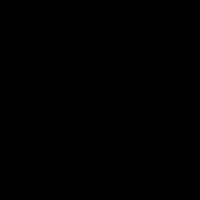

In [121]:
temp_image.convert('LA')